In [1]:
from qiskit import QuantumCircuit, assemble, Aer, execute
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.quantum_info import Statevector
from math import sqrt, pi
import numpy as np

Stan układu kwantowego jest opisywany w Qiskit przy pomocy obiektu `Statevector` (wektor stanu).  
Przy inicjalizacji nowego obwodu kwantowego (QuantumCircuit) domyślnie wszystkie kubity są w stanie |0>.  

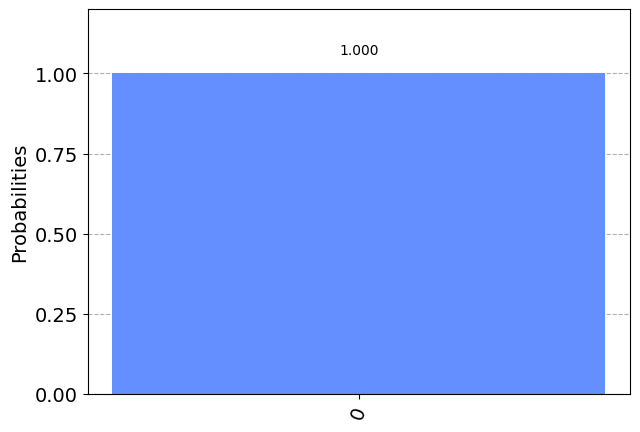

In [2]:
qc = QuantumCircuit(1,1)
qc.measure(0,0)

simulator = Aer.get_backend('aer_simulator')
result = simulator.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

Możemy jednak zainicjalizować układ w innym stanie początkowym - np. w superpozycji stanu 0 oraz 1. W tym celu użyć należy metody `.initialize()`. 

In [3]:
qc = QuantumCircuit(1,1)          # tworzymy układ 1 kubit + 1 bit klasyczny
initial_state = [1,1]/np.sqrt(2)  # określamy żądany stan początkowy (|+>)
qc.initialize(initial_state, 0)   # podajemy stan do inicjalizacji oraz indeks kubitu
qc.measure(0,0)                   
qc.draw()  

┌─────────────────────────────┐┌─┐
  q: ┤ Initialize(0.70711,0.70711) ├┤M├
     └─────────────────────────────┘└╥┘
c: 1/════════════════════════════════╩═
                                     0

Ponownie możemy wykonać pomiary, aby upewnić się, że mierzymy inny stan.

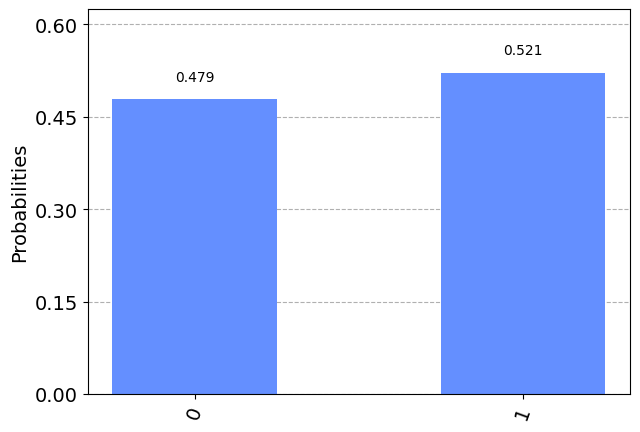

In [4]:
counts = execute(qc,simulator).result().get_counts()
plot_histogram(counts) 

Aby wyświetlić lub zapisać stan (wektor) układu podczas ewolucji, użyjemy klasy `Statevector` z modułu `qiskit.quantum_info`.  

In [5]:
qc = QuantumCircuit(2)
st0 = Statevector.from_instruction(qc) 
qc.h(0)
st1 = Statevector.from_instruction(qc)
qc.cnot(0, 1)
st2 = Statevector.from_instruction(qc)

print(st0)
print(st1)
array_to_latex(st2)

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))
Statevector([0.70710678+0.j, 0.70710678+0.j, 0.        +0.j,
             0.        +0.j],
            dims=(2, 2))


<IPython.core.display.Latex object>

**Ćwiczenie**:
1. Podać wektor stanu, który daje prawdopodobieństwo 1/3 zmierzenia kubitu w stanie |0>.
2. Podać inny wektor stanu, który daje takie same prawdopodobieństwa pomiarów, co wektor z punktu 1.
4. Zaimplementować stany w Qiskit i zweryfikować czy histogramy pomiarów zgadzają się z przewidywaniami.

In [ ]:
# Tutaj należy zmienić wektory stanu na inne (zgodnie z podpunktami 1 i 2)
first_state = [1, 0] 
second_state = [1, 0]

# Uzupełnić definicję symulatora jakiego będziemy używać
sim = ...

# Zdefiniowanie obwodu + inicjalizacja w określonym stanie
qc = ...
qc.initialize(...)

# Wykonanie pomiarów
qc.measure_all()
result = sim.run(qc).result()

# Narysowanie wyników
counts = ...
plot_histogram(counts)